# Visualize training and test images for classifiers

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import glob

%matplotlib inline

In [2]:
import pickle

In [3]:
import math

# Helper method to plot multiple images
def plot_multiple_images(images,names,gray=False,number_of_cols=6,w_factor=4,h_factor=2):
    
    number_of_images=len(images)

    number_of_rows=math.ceil(number_of_images*1.0/number_of_cols)

    
    
    fig_width=w_factor*number_of_cols  
    fig_height=h_factor*number_of_rows
    
    if number_of_rows > 5 :
        _dpi = number_of_rows * 5
    else :
        _dpi = 30
    
    #fig=plt.figure(figsize=(fig_width, fig_height),dpi=_dpi, facecolor='w', edgecolor='w')
    fig=plt.figure(figsize=(fig_width, fig_height), facecolor='w', edgecolor='w')
    
    im_number=0
    for im, name in zip(images,names):
        im_number+=1
        plt.subplot(number_of_rows,number_of_cols,im_number)
        plt.title(name)
        if gray :
            plt.imshow(im,cmap='gray')
        else :
            plt.imshow(im)

In [4]:
car_images_paths_png = glob.glob('train_test_images/vehicles/*/*.png')
no_car_images_paths_png = glob.glob('train_test_images/non-vehicles/*/*.png')

In [5]:
print('number of car samples ' , len(car_images_paths_png))
im_path=np.random.choice(car_images_paths_png)
im=cv2.imread(im_path)
print(im.shape)
print(im.dtype)
print(np.min(im))
print(np.max(im))

number of car samples  8792
(64, 64, 3)
uint8
3
255


In [6]:
imrgb=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

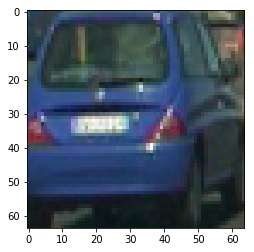

In [7]:
plt.imshow(imrgb)

In [8]:
print('number of non car samples ' , len(no_car_images_paths_png))
im_path=np.random.choice(no_car_images_paths_png)
im=cv2.imread(im_path)
print(im.shape)
print(im.dtype)
print(np.min(im))
print(np.max(im))

number of non car samples  8968
(64, 64, 3)
uint8
5
212


In [9]:
imrgb=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

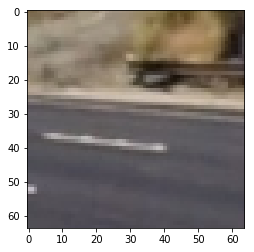

In [10]:
plt.imshow(imrgb)

In [11]:
sample_car_images=[]
sample_car_files=[]
for i in range(15):
    im_path=np.random.choice(car_images_paths_png)
    #im=mpimg.imread(im_path)
    im=cv2.imread(im_path)
    im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    file_name=im_path.split('\\')[2]
    sample_car_images.append(im)
    sample_car_files.append(file_name)

In [12]:
sample_non_car_images=[]
sample_non_car_files=[]
for i in range(15):
    im_path=np.random.choice(no_car_images_paths_png)
    #im=mpimg.imread(im_path)
    im=cv2.imread(im_path)
    im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    file_name=im_path.split('\\')[2]
    sample_non_car_images.append(im)
    sample_non_car_files.append(file_name)

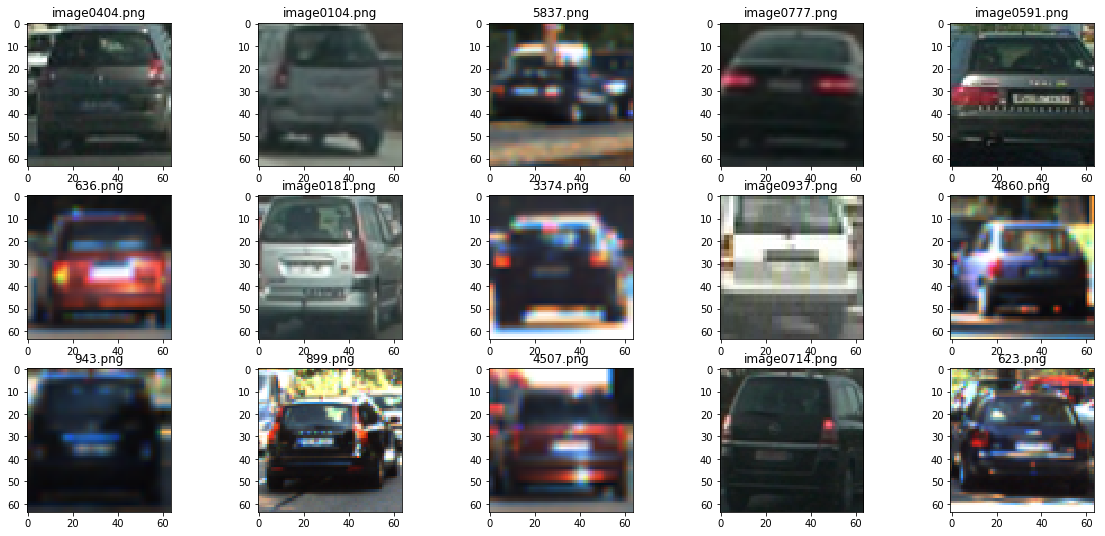

In [13]:
plot_multiple_images(sample_car_images,sample_car_files,gray=False,number_of_cols=5,w_factor=4,h_factor=3)

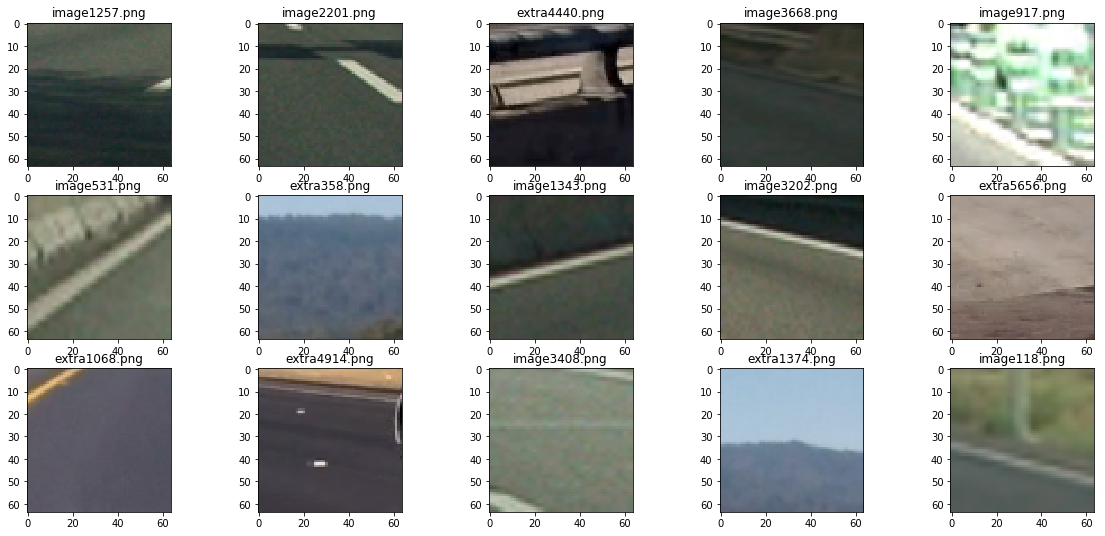

In [14]:
plot_multiple_images(sample_non_car_images,sample_non_car_files,gray=False,number_of_cols=5,w_factor=4,h_factor=3)

# Extract Features from images

In [15]:
def color_hist(img, nbins=32, bins_range=(0, 256)):
   
    hist1 = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    hist2 = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    hist3 = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    
    color_hist_features = np.concatenate((hist1[0], hist2[0], hist3[0]))
    
    return color_hist_features

In [16]:
def convert_color(img, cspace='HSV'):
    
    if cspace != 'RGB':
        if cspace == 'HSV':
            converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif cspace == 'LUV':
            converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif cspace == 'HLS':
            converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif cspace == 'YUV':
            converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif cspace == 'YCrCb':
            converted_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        else :
            raise('color space ', cspace , ' not supported')
    else: 
        converted_img = np.copy(img)      
    
    return converted_img

In [17]:
from skimage.feature import hog

def get_hog_features(img,color_spce='RGB',channel=0, orient=9, pix_per_cell=8, cell_per_block=2, 
                        vis=False, feature_vec=True):
    hog_image=None
    im=convert_color(img,color_spce)
    im_channel=im[:,:,channel]
    if vis : 
        features, hog_image = hog(im_channel, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                      cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                                      transform_sqrt=True, 
                                      visualise=True, feature_vector=feature_vec) 
    else : 
        features= hog(im_channel, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                      cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                                      transform_sqrt=True, 
                                      visualise=False, feature_vector=feature_vec)   

    return features, hog_image


In [18]:
def extract_features(imgs, is_png=False, orient=9, pix_per_cell=8, cell_per_block=2,hist_bins=32,hist_range=(0,256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    count=0
    for image in imgs:
        # Read in each one by one
        #image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if count % 1000 ==0 :
            print(count)
        count+=1

        # Hog feature for R channle
        hog_r_channel,_ = get_hog_features(image,color_spce='RGB',channel=0, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, vis=False, feature_vec=True)
        
        # H L S for HLS color space
        hog_h_channel,_ = get_hog_features(image,color_spce='YCrCb',channel=0, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, vis=False, feature_vec=True)
        hog_l_channel,_ = get_hog_features(image,color_spce='YCrCb', channel=1,orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, vis=False, feature_vec=True)
        hog_s_channel,_ = get_hog_features(image,color_spce='YCrCb', channel=2,orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, vis=False, feature_vec=True)
        

        
        hog_features=np.concatenate((hog_r_channel,hog_h_channel,hog_l_channel,hog_s_channel)) 
        # Append the new feature vector to the features list
        #bin_feature = bin_spatial(im,size=spatial_size)
        col_hist = color_hist(image,nbins=hist_bins, bins_range=hist_range)        
        '''
        print('hist_min',np.min(col_hist))
        print('hist_max',np.max(col_hist))
        '''
        
        im_features = np.concatenate((hog_features,col_hist))        
        features.append(im_features)
    # Return list of feature vectors
    return features

In [20]:
car_images_large=[cv2.cvtColor(cv2.imread(im_path),cv2.COLOR_BGR2RGB) for im_path in car_images_paths_png]
non_car_images_large=[cv2.cvtColor(cv2.imread(im_path),cv2.COLOR_BGR2RGB) for im_path in no_car_images_paths_png]

In [ ]:
import time
colorspace = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8
cell_per_block = 2
histbin = 32
hist_range=(0, 256)

t=time.time()
car_features = extract_features(car_images_large,is_png=False, orient=orient,pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                hist_bins = histbin,hist_range=(0, 256))
notcar_features = extract_features(non_car_images_large,is_png=False,orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                   hist_bins = histbin,hist_range=(0, 256))
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract image features...')

In [24]:
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)

In [26]:
# Fit a per-column scaler only on the training data
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X_train and X_test
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

In [27]:
scaler_file=open('x_scaler_png_2.pkl','wb')
pickle.dump(X_scaler,scaler_file)

## Choose classifier

In [28]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time.time() # Get start time
    learner = learner.fit(X_train[:samples], y_train[:samples])
    end = time.time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time.time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time.time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.1)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.1)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

clf_A = GaussianNB()
clf_B = RandomForestClassifier(random_state = 864)
clf_C = LinearSVC()

samples_100 = int(len(y_train))
samples_10 = int(len(y_train)/10.)
samples_1 = int(len(y_train)/100.)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

GaussianNB trained on 142 samples.
GaussianNB trained on 1420 samples.
GaussianNB trained on 14208 samples.
RandomForestClassifier trained on 142 samples.
RandomForestClassifier trained on 1420 samples.
RandomForestClassifier trained on 14208 samples.
LinearSVC trained on 142 samples.
LinearSVC trained on 1420 samples.
LinearSVC trained on 14208 samples.


In [30]:
def print_results(results,clf_name):
    print(clf_name +' (1%) train_time = ' + str(results[clf_name][0]['train_time']))
    print(clf_name +' (1%) pred_time = ' + str(results[clf_name][0]['pred_time']))
    print(clf_name +' (1%) acc_train = ' + str(results[clf_name][0]['acc_train']))
    print(clf_name +' (1%) acc_test = ' + str(results[clf_name][0]['acc_test']))
    print(clf_name +' (1%) f_train = ' + str(results[clf_name][0]['f_train']))
    print(clf_name +' (1%) f_test = ' + str(results[clf_name][0]['f_test']))
    print('')
    print(clf_name +' (10%) train_time = ' + str(results[clf_name][1]['train_time']))
    print(clf_name +' (10%) pred_time = ' + str(results[clf_name][1]['pred_time']))
    print(clf_name +' (10%) acc_train = ' + str(results[clf_name][1]['acc_train']))
    print(clf_name +' (10%) acc_test = ' + str(results[clf_name][1]['acc_test']))
    print(clf_name +' (10%) f_train = ' + str(results[clf_name][1]['f_train']))
    print(clf_name +' (10%) f_test = ' + str(results[clf_name][1]['f_test']))
    print('')
    print(clf_name +' (100%) train_time = ' + str(results[clf_name][2]['train_time']))
    print(clf_name +' (100%) pred_time = ' + str(results[clf_name][2]['pred_time']))
    print(clf_name +' (100%) acc_train = ' + str(results[clf_name][2]['acc_train']))
    print(clf_name +' (100%) acc_test = ' + str(results[clf_name][2]['acc_test']))
    print(clf_name +' (100%) f_train = ' + str(results[clf_name][2]['f_train']))
    print(clf_name +' (100%) f_test = ' + str(results[clf_name][2]['f_test']))

In [31]:
print_results(results,'GaussianNB')
print()
print_results(results,'LinearSVC')
print()
print_results(results,'RandomForestClassifier')

GaussianNB (1%) train_time = 0.17251253128051758
GaussianNB (1%) pred_time = 1.2620770931243896
GaussianNB (1%) acc_train = 0.8866666666666667
GaussianNB (1%) acc_test = 0.8730292792792793
GaussianNB (1%) f_train = 0.853736737787105
GaussianNB (1%) f_test = 0.8576286973756891

GaussianNB (10%) train_time = 0.43181347846984863
GaussianNB (10%) pred_time = 1.2609167098999023
GaussianNB (10%) acc_train = 0.8633333333333333
GaussianNB (10%) acc_test = 0.8502252252252253
GaussianNB (10%) f_train = 0.810014089086377
GaussianNB (10%) f_test = 0.8062727712556405

GaussianNB (100%) train_time = 3.8307840824127197
GaussianNB (100%) pred_time = 1.3029472827911377
GaussianNB (100%) acc_train = 0.8533333333333334
GaussianNB (100%) acc_test = 0.8541666666666666
GaussianNB (100%) f_train = 0.806709265175719
GaussianNB (100%) f_test = 0.8097631295727643

LinearSVC (1%) train_time = 0.1878221035003662
LinearSVC (1%) pred_time = 0.15336251258850098
LinearSVC (1%) acc_train = 0.9533333333333334
LinearSVC

# Fine tune parameters for selected classfier

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the classifier
clf = RandomForestClassifier(random_state=864)
#clf = LinearSVC()
print(clf.get_params().keys())

# Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators':[14, 20],'max_depth':[30, 35], 'min_samples_split':[12, 16], 'min_samples_leaf':[2, 8]}
#parameters = {'loss':['hinge', 'squared_hinge'],'C':[1,0.9]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.10)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid = parameters, scoring = scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

best_params = grid_fit.best_params_

print('Best parameters ', best_params)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.10)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.10)))

dict_keys(['max_depth', 'min_weight_fraction_leaf', 'min_impurity_split', 'verbose', 'warm_start', 'criterion', 'bootstrap', 'max_features', 'min_samples_split', 'min_impurity_decrease', 'random_state', 'max_leaf_nodes', 'min_samples_leaf', 'oob_score', 'class_weight', 'n_jobs', 'n_estimators'])
Best parameters  {'max_depth': 30, 'min_samples_split': 16, 'min_samples_leaf': 2, 'n_estimators': 20}
Unoptimized model
------
Accuracy score on testing data: 0.9685
F-score on testing data: 0.9883

Optimized Model
------
Final accuracy score on the testing data: 0.9716
Final F-score on the testing data: 0.9856


In [33]:
model_file=open('random_forest_14_night.pkl','wb')
pickle.dump(best_clf,model_file)

In [14]:
model_file1=open('random_forest_14_night.pkl','rb')
best_clf1=pickle.load(model_file1)

In [35]:
best_predictions1 = best_clf1.predict(X_test)

In [36]:
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions1)))

Final accuracy score on the testing data: 0.9716


In [37]:
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions1, beta = 0.10)))

Final F-score on the testing data: 0.9856


# Window sliding pipeline

In [19]:

def get_bounding_boxes(img,classifier, ystart, ystop, scale, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    #img = img.astype(np.float32)/255
    
    #print('ystart ',ystart)
    #print('ystop ',ystop)
    
    # restrict area of finding cars
    img_tosearch = img[ystart:ystop,:,:]
    #scaled_image = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = img_tosearch.shape
        scaled_image = cv2.resize(img_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))    
    else : 
        scaled_image = img_tosearch
        
    ch = scaled_image[:,:,0]
    
    # cell_per_block = 2
    # pix_per_cell = 8    

    nxblocks = (ch.shape[1] // pix_per_cell) - cell_per_block + 1  ## Y/8 - 1 ## 64/8-1 = 7
    nyblocks = (ch.shape[0] // pix_per_cell) - cell_per_block + 1  ## 1280/8-1 = 159 # 320/8-1 = 39 (for scale=4)
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1 ##(64/8)-2+1 = 7
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1  ## (159-7)/2+1 =77; (39-7)/2+1 = 17
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1  ## (7-7)/2+1 = 1 
    
    # Compute individual channel HOG features for the entire image
    #hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    #hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    #hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    # Hog feature for R channle
    hog_r_channel,_ = get_hog_features(scaled_image,color_spce='RGB',channel=0, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, vis=False, feature_vec=False)
        
    # H L S for HLS color space
    hog_h_channel,_ = get_hog_features(scaled_image,color_spce='YCrCb',channel=0, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, vis=False, feature_vec=False)
    hog_l_channel,_ = get_hog_features(scaled_image,color_spce='YCrCb', channel=1,orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, vis=False, feature_vec=False)
    hog_s_channel,_ = get_hog_features(scaled_image,color_spce='YCrCb', channel=2,orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, vis=False, feature_vec=False)
    
    bb_boxes = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step # 0 x 2 = 0
            xpos = xb*cells_per_step # 0 x 2 to 76 x 2 = 0 to 152 or 0 to 32
            # Extract HOG for this patch
            #hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            #hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            #hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            #hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            
            hog_r = hog_r_channel[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
            hog_h = hog_h_channel[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
            hog_l = hog_l_channel[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
            hog_s = hog_s_channel[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel()
            hog_features = np.hstack((hog_r, hog_h, hog_l,hog_s))

            xleft = xpos*pix_per_cell # 0 x 8 to 152*8 = 0 to 1216 [1216+64] = 1280 # 0 to 32 * 8 = 0 to 256
            ytop = ypos*pix_per_cell  # 0 x 8 = 0 

            # Extract the image patch
            # y = 0+64 , x = 0 + 64 to 1216+64 (1280)
            subimg = cv2.resize(scaled_image[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            #spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((hog_features,hist_features)).reshape(1, -1))               
            test_prediction = classifier.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale) # (0 to 256) x 4 = 1024 [1024 + 64 x 4 = 1280]
                ytop_draw = np.int(ytop*scale) # 0 
                win_draw = np.int(window*scale)
                #cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                box=((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart))
                bb_boxes.append(box)
    # return draw_img, bb_boxes
    return bb_boxes

In [20]:
scaler_file=open('x_scaler_png_2.pkl','rb')
X_scaler = pickle.load(scaler_file)

In [21]:
model_file1=open('random_forest_14_night.pkl','rb')
best_clf1=pickle.load(model_file1)

In [22]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # make a copy of the image
    draw_img = np.copy(img)
    
    # draw each bounding box on your image copy using cv2.rectangle()
    # return the image copy with boxes drawn
    for box in bboxes :
        cv2.rectangle(draw_img,box[0],box[1],color,thick)
    
    return draw_img # Change this line to return image copy with boxes

In [23]:
def get_heatmap(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes

In [24]:
def draw_labeled_bboxes(img, labels):
    
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

In [25]:
def get_labeled_bboxes(labels):
    bboxes=[]
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        #bboxes[car_number]=bbox
        bboxes.append(bbox)
        # Draw the box on the image
        #cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return bboxes

In [26]:
test_image1=mpimg.imread('test_images/test6.jpg')

In [27]:
ystart=400
ystop=528
scale=1.5
orient=9
pix_per_cell=8
cell_per_block=2
hist_bins=32
spatial_size=32

In [28]:
bb_boxes = get_bounding_boxes(test_image1,best_clf1, ystart, ystop, scale, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

In [29]:
bb_im=draw_boxes(test_image1,bb_boxes)

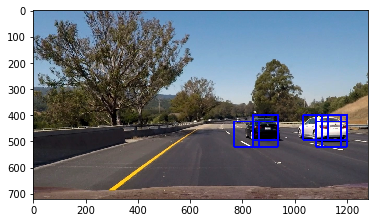

In [30]:
plt.imshow(bb_im)

In [31]:
heatmap = np.zeros_like(test_image1[:,:,0]).astype(np.float)
heatmap=get_heatmap(heatmap,bb_boxes)
heat_threshold=2
heatmap[heatmap <= heat_threshold] = 0
heatmap_img = np.clip(heatmap, 0, 255)

In [32]:
from scipy.ndimage.measurements import label

In [33]:
# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(test_image1), labels)

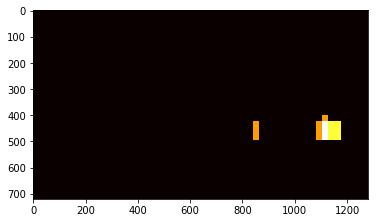

In [34]:
plt.imshow(heatmap_img,cmap='hot')

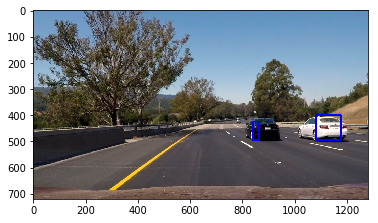

In [35]:
plt.imshow(draw_img)

# Test on different test images

In [36]:
test_image_files = glob.glob('test_images/*.jpg')
test_images=[mpimg.imread(im_path) for im_path in test_image_files]
test_file_names=[im_path.split('\\')[1] for im_path in test_image_files]

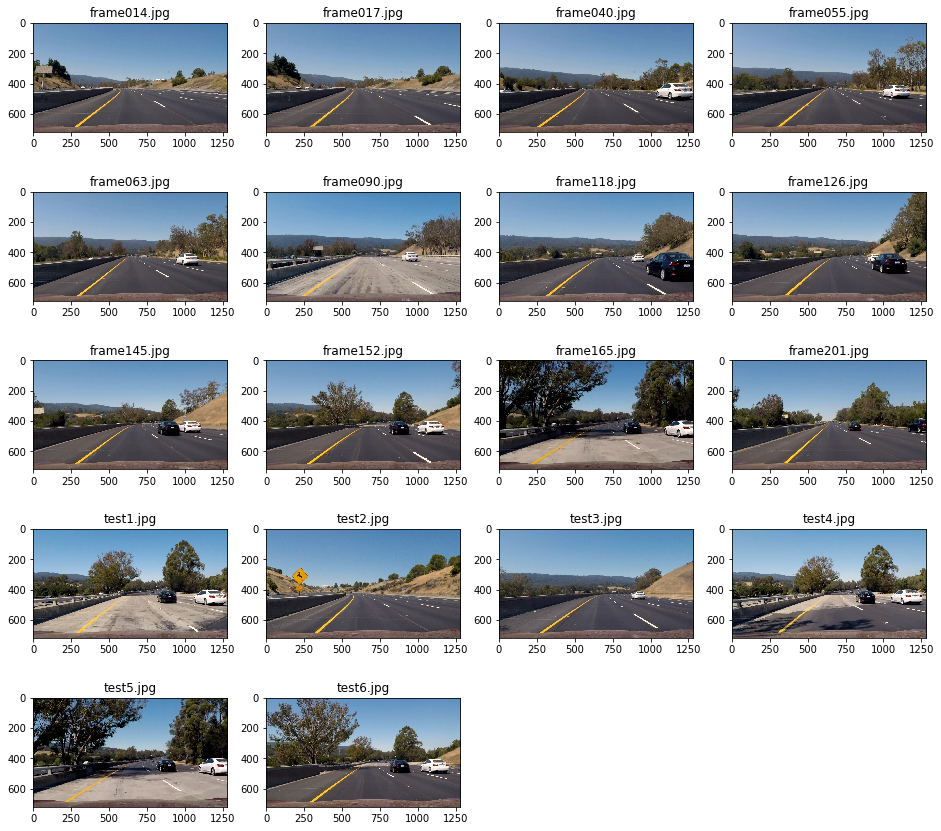

In [37]:
plot_multiple_images(test_images,test_file_names,gray=False,number_of_cols=4,w_factor=4,h_factor=3)

In [38]:
img_samples=[test_images[11].copy(),test_images[8].copy(),test_images[6].copy()]
img_samples_names=['far','mid','close']

for img_sample in img_samples :
    cv2.rectangle(img_sample,(0,400),(1280,496),(255,0,0), 6)  # keep normal scale
    cv2.rectangle(img_sample,(0,400),(1280,528),(0,255,0), 6)  # keep scale 2 = 128/2 = 64 
    cv2.rectangle(img_sample,(0,400),(1280,592),(0,0,255), 6)  # keep scale 3 = 192/3 = 64
    

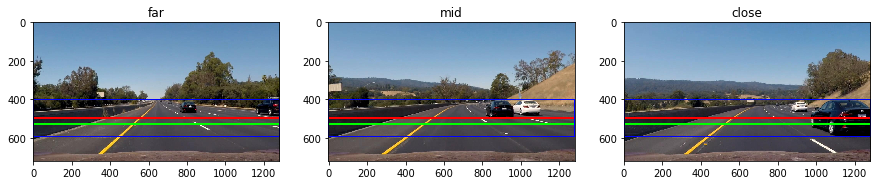

In [39]:
plot_multiple_images(img_samples,img_samples_names,gray=False,number_of_cols=3,w_factor=5,h_factor=4)

In [40]:
def draw_special_boxes(im,im_bb_boxes_to_draw):
    
    for conf in im_bb_boxes_to_draw :
        color=conf[0]
        bboxes=conf[1]
        #print(color)
        if color=='R' :
            im = draw_boxes(im, bboxes, color=(255, 0, 0))
            #print('red bounding boxes',bboxes)
        elif color=='G' :
            im = draw_boxes(im, bboxes, color=(0, 255, 0))
            #print('green bounding boxes',bboxes)
        elif color=='B' :
            im = draw_boxes(im, bboxes, color=(0, 0, 255))
            #print('blue bounding boxes',bboxes)
        elif color=='W' :
            im = draw_boxes(im, bboxes, color=(255, 255, 255))
            #print('white bounding boxes',bboxes)
                            
    return im
                       

In [41]:
box_color = {1 :'R', 2 : 'G' ,3 : 'B',4:'W' }

In [42]:
small_test_set=[test_images[11].copy(),test_images[8].copy(),test_images[6].copy()]
img_samples_names=['far','mid','close']

In [43]:
#scale_portion_map = { 2 : (380,636)}
# config number : (scale,y_start,y_end)
scale_portion_map = {1 : (1.0,400,496), \
                     2 : (1.5,400,528),\
                     3 : (2.0,400,528),\
                     4 : (3.0,400,592)}


bb_images=[]
final_imaegs=[]
hitmap_imaegs=[]
heat_threshold=1

index=0

for img in test_images:
#for img in small_test_set :
    bb_image=img
    im_bb_boxes=[]
    im_bb_boxes_to_draw=[]
    
    for config_number, y_start_stop in scale_portion_map.items():
        scale=y_start_stop[0]
        bb_boxes = get_bounding_boxes(img,best_clf1, y_start_stop[1], y_start_stop[2], scale, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        #print('for image ', test_file_names[index],' no. bb boxes : ', len(bb_boxes))
        #print(bb_boxes)
        im_bb_boxes.extend(bb_boxes)
        im_bb_boxes_to_draw.append((box_color[config_number],bb_boxes))    
    
    #print('bounding box list shape ',im_bb_boxes)
    #bb_image = draw_boxes(bb_image,im_bb_boxes_to_draw)
    bb_image=draw_special_boxes(bb_image,im_bb_boxes_to_draw)
        
    heatmap = np.zeros_like(img[:,:,0]).astype(np.float)        
    heatmap=get_heatmap(heatmap,im_bb_boxes)
    heatmap[heatmap <= heat_threshold] = 0
        
    bb_images.append(bb_image)
        
    heatmap_img = np.clip(heatmap, 0, 255)
    hitmap_imaegs.append(heatmap_img)
    labels = label(heatmap)
    im_cars = draw_labeled_bboxes(np.copy(img), labels)
    final_imaegs.append(im_cars)
              
    index+=1

In [44]:
image_sequence=[]
image_name_sequence=[]

for bb_im,hitmap,final,file_name in zip(bb_images,hitmap_imaegs,final_imaegs,test_file_names):
    
    image_sequence.append(bb_im)
    image_sequence.append(hitmap)
    image_sequence.append(final)
    image_name_sequence.append(file_name+" boxes")
    image_name_sequence.append(file_name+" hitmap")
    image_name_sequence.append(file_name+" final")   

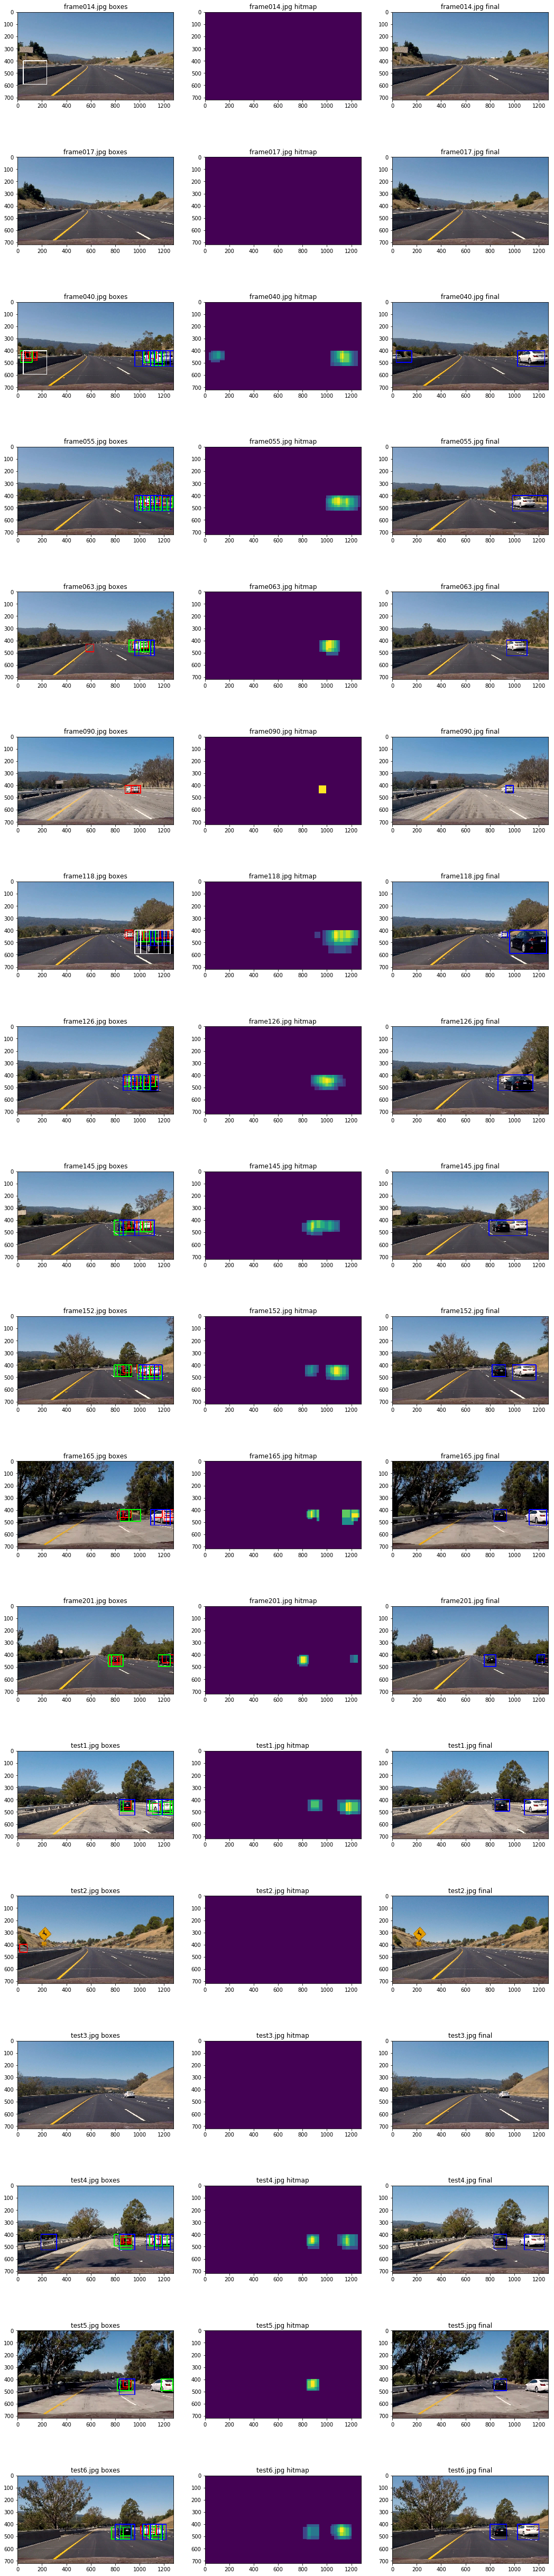

In [45]:
plot_multiple_images(image_sequence,image_name_sequence,gray=False,number_of_cols=3,w_factor=6,h_factor=5)

# Final pipeline

In [53]:
class PostitionsQueue:
    def __init__(self,retain):
        self.frames_to_retain=retain
        self.items = []

    def isEmpty(self):
        return self.items == []

    def add_postition(self, item):
        self.items.insert(0,item)
        #if self.size() > self.frames_to_retain :
            #self.remove_oldest_postion()            
        
    def remove_oldest_postion(self):
        return self.items.pop()

    def get_last_n_postitions(self):
        return self.items[:self.frames_to_retain]
    
    def get_lastest_postition(self):
        if self.size() > 0 :
            return self.items[0]
        return None
            
    def size(self):
        return len(self.items)


In [54]:
class Car :
    total_cars=0
    def __init__(self,car_n):
        self.positions=PostitionsQueue(3)
        self.frames_processed=0
        #print('setting car number to ', car_n)
        self.car_number=car_n
        
    def get_last_position(self):
        return self.positions.get_lastest_postition()

    def get_avg_center(self,boxes):
        
        x_sum=0
        y_sum=0        
        n_boxes=0
        for box in boxes :
            x1=box[0][0]
            x2=box[1][0]
            y1=box[0][1]
            y2=box[1][1]
            x_sum+=(x1+x2)
            y_sum+=(y1+y2)
            n_boxes+=1
        x_c=x_sum//(n_boxes*2)
        y_c=y_sum//(n_boxes*2)
        
        return x_c,y_c

    def get_ajusted_position(self,new_box):
        # logic to avarage out boxes
        boxes = self.positions.get_last_n_postitions()
        
        x_c = None
        y_c = None
        #print("out boxes",len(boxes))
        if len(boxes) > 0 :
            #print("in len boxes")
            x_c,y_c = self.get_avg_center(boxes)       
        
        #print('x_c',x_c)
        #print('y_c',y_c)
        
        new_box_x_c = (new_box[0][0]+new_box[1][0]) // 2     
        new_box_y_c = (new_box[0][1]+new_box[1][1]) // 2
        
        #print('new_box_x_c',new_box_x_c)
        #print('new_box_y_c',new_box_y_c)

        if x_c :
            new_x_c = (new_box_x_c * 2 + x_c) // 3 # new box has weight 2:1
            new_y_c = (new_box_y_c * 2 + y_c) // 3
        else :
            new_x_c = new_box_x_c
            new_y_c = new_box_y_c
            
        #print('updated new_x_c',new_x_c)
        #print('updated new_y_c',new_y_c)
        
        new_w = new_box[1][0]-new_box[0][0]
        new_h = new_box[1][1]-new_box[0][1]

        prev_w=None
        prev_h=None        
        if len(boxes) > 0 :
            prev_box = boxes[0]
            prev_w = prev_box[1][0] - prev_box[0][0]
            prev_h = prev_box[1][1] - prev_box[0][1]
            
        #print('prev_w',prev_w)
        #print('prev_h',prev_h)

        #print('new_w',new_w)
        #print('new_h',new_h)
        
        # get avg width
        if prev_w : 
            avg_w = (new_w*2 + prev_w)//3 # 
            avg_h = (new_h*2 + prev_h)//3
        else :
            avg_w = new_w
            avg_h = new_h
        
        #print('avg_w',avg_w)
        #print('avg_w',avg_h)
        
        new_x1=new_x_c-avg_w//2
        new_y1=new_y_c-avg_h//2
        new_x2=new_x_c+avg_w//2
        new_y2=new_y_c+avg_h//2
        
        new_x11=new_box_x_c-avg_w//2
        new_y11=new_box_y_c-avg_h//2
        new_x22=new_box_x_c+avg_w//2
        new_y22=new_box_y_c+avg_h//2 
        
        
        new_pos=((new_x1,new_y1),(new_x2,new_y2))        
        new_pos1=((new_x11,new_y11),(new_x22,new_y22))
        
       # print('new_pos',new_pos)
        #print('new_pos1',new_pos1)
        
        self.set_position(new_pos)
        return new_pos
    
    def set_position(self,boxes):
        return self.positions.add_postition(boxes)
    

        
    #     
    def is_car_there_in_last_3_frames(self):
        
        if self.frames_processed < 3 :
            self.frames_processed+=1            
        
        #print('car ',self.car_number,'frames ', self.frames_processed, 'old postions ', self.positions.size())
        if  self.frames_processed > 2 :         
            
            self.positions.remove_oldest_postion()
            self.frames_processed-=1                
                       
            if self.positions.isEmpty() :
                return False
   
        return True

In [55]:
class CarTracker():
    
    def __init__(self):
        Car.total_cars=0
        self.cars=[]
    
    # 
    def get_adjusted_postitions(self,boxes):
        #print('total cars in tracker', len(self.cars))
        if len(self.cars) == 0 :
            self.add_new_cars(boxes)
            return boxes
        
        new_boxes=[]
        cars_copy=self.cars[:]
        #print('cars_copy length ' , len(cars_copy))
        for box in boxes :
            found_car = False
            #print('current box',box)
            for car in cars_copy :
                #print('checking for car number',car.car_number)
                old_pos = car.get_last_position()
                
                if not old_pos :
                    try :
                        cars_copy.remove(car)
                        self.cars.remove(car)
                    except : 
                        break
                    break
                    
                #print('old pos for car ', car.car_number, old_pos)
                if self.is_same_car(box,old_pos):
                    #print('its same car no', car.car_number)
                    new_position = car.get_ajusted_position(box)
                    new_boxes.append(new_position)
                    found_car=True
                    cars_copy.remove(car) # from car iteration      
                else :                    
                    ## check for other car
                    #print('its other car')
                    pass
                
                if not car.is_car_there_in_last_3_frames() :
                    #print('removing car no',car.car_number)
                    self.cars.remove(car)
                    
                if found_car : # break car loop
                    break 
                
            
            if not found_car :
                #print('car not found for box',box)
                self.add_new_car(box)
                new_boxes.append(box)
                
        return new_boxes
            
                 
    # if car is in visinity of 15 pixels
    def is_same_car(self,box,old_pos):
        x1,y1 = self.get_center(box)
        x2,y2 = self.get_center(old_pos)
        
        #print('current center',(x1,y1))
        #print('old center',(x2,y2))
        
        if abs(x1-x2) <= 30 and abs(y1-y2) <=30 :
            return True
        else :
            return False
    
    def get_center(self,box):
        
        xx1,yy1 = box[0]
        xx2,yy2 = box[1]
        
        x_av=(xx1+xx2)//2
        y_av=(yy1+yy2)//2
        
        return (x_av,y_av)
    
    def add_new_car(self,box):
        Car.total_cars+=1
        #print('total cars', Car.total_cars)
        car = Car(Car.total_cars)
        car.set_position(box)
        self.cars.append(car)
        
    def add_new_cars(self,boxes):        
        for box in boxes :
            self.add_new_car(box)

In [46]:
from scipy.ndimage.measurements import label
import pickle

In [47]:
model_file=open('random_forest_14_night.pkl','rb')
best_clf1=pickle.load(model_file)
scaler_file=open('x_scaler_png_2.pkl','rb')
X_scaler = pickle.load(scaler_file)

In [48]:

def vedio_pipeline(img):
    scale_portion_map = {1 : (400,496), \
                        1.5 : (400,528),\
                        2.0 : (400,528),\
                        4.0 : (400,592)}
    orient=9
    pix_per_cell=8
    cell_per_block=2
    hist_bins=32
    spatial_size=32
    heat_threshold=1
                         
    
    im_bb_boxes=[]
    
    for scale, y_start_stop in scale_portion_map.items():
        bb_boxes = get_bounding_boxes(img,best_clf1, y_start_stop[0], y_start_stop[1], scale, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
        #print('for image ', test_file_names[index],' no. bb boxes : ', len(bb_boxes))
        #print(bb_boxes)
        im_bb_boxes.extend(bb_boxes)
        
    heatmap = np.zeros_like(img[:,:,0]).astype(np.float)        
    heatmap=get_heatmap(heatmap,im_bb_boxes)
    heatmap[heatmap <= heat_threshold] = 0  
    labels = label(heatmap)
    
    bboxes = get_labeled_bboxes(labels)
    adjusted_boxes = tracker.get_adjusted_postitions(bboxes)
    im_cars = draw_boxes(np.copy(img), adjusted_boxes)
    return im_cars
    



In [49]:
vid_image_files = glob.glob('vid_frames/*.jpg')
vid_images=[mpimg.imread(im_path) for im_path in vid_image_files]
vid_file_names=[im_path.split('\\')[1] for im_path in vid_image_files]

In [50]:
len(vid_file_names)

90

In [56]:
tracker = CarTracker()
processed_images=[]
for vid_im in vid_images:
    processed=vedio_pipeline(vid_im)
    processed_images.append(processed)

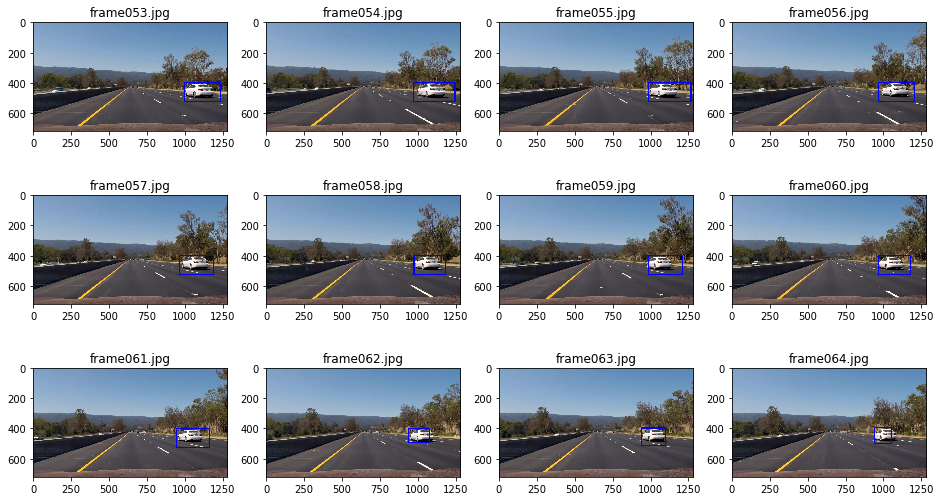

In [32]:
plot_multiple_images(processed_images[:12],vid_file_names[:12],gray=False,number_of_cols=4,w_factor=4,h_factor=3)

# Process on video

In [58]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [55]:
tracker = CarTracker()
input_video='./project_video.mp4'
output_video = './project_video_output2.mp4'

clip1 = VideoFileClip(input_video)#.subclip(3,41)
out_clip = clip1.fl_image(vedio_pipeline)
%time out_clip.write_videofile(output_video, audio=False)

clip1.reader.close()
clip1.audio.reader.close_proc()

out_clip.reader.close()
out_clip.audio.reader.close_proc()

del clip1
del out_clip

[MoviePy] >>>> Building video ./project_video_output2.mp4
[MoviePy] Writing video ./project_video_output2.mp4



 25%|██▌       | 321/1261 [08:57<23:48,  1.52s/it]


 51%|█████     | 641/1261 [17:06<15:13,  1.47s/it]


 76%|███████▌  | 961/1261 [25:05<08:18,  1.66s/it]


100%|█████████▉| 1260/1261 [32:12<00:01,  1.31s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./project_video_output2.mp4 

Wall time: 32min 14s


In [56]:
# 1280 x 720
HTML("""
<video width="1280" height="720" controls> 
  <source src="{0}">
</video>
""".format(output_video))

In [59]:
input_video='./project_video_output2.mp4'
clip = VideoFileClip(input_video).subclip(38,42) 
list_of_files=clip.write_images_sequence('for_animation/frame%03d.jpg',fps=8)
del clip

[MoviePy] Writing frames for_animation/frame%03d.jpg.

32it [00:01, 16.30it/s]                      


[MoviePy]: Done writing frames for_animation/frame%03d.jpg.



In [60]:
import imageio
import os

In [61]:
dir_path='./for_animation'
filenames=[x for x in os.listdir(dir_path)]

In [62]:
images = []
for filename in filenames:
    filepath=dir_path+"/"+filename
    im = imageio.imread(filepath)
    im = cv2.resize(im,(640,360))
    images.append(im)
imageio.mimsave('./demo.gif', images)